# Exercise 8.1

This exercise is from MacKay, Information Theory, Inference, and Learning Algorithms:

>Unstable particles are emitted from a source and decay at a distance x, a real number that has an exponential probability distribution with [parameter] $\lambda$. Decay events can only be observed if they occur in a window extending from $x=1\ cm$ to $x=20\ cm$. N decays are observed at locations $\left\{1.5, 2, 3, 4, 5, 12\right\}cm$. What is the posterior distribution of $\lambda$?

You can download a solution to this exercise from http://thinkbayes.com/decay.py.

### Theory

As usual the theory starts with

$P(\lambda|Data) = \frac{P(Data|\lambda)P(\lambda)}{P(Data)}$

where

$P(Data|\lambda) \sim Exponential(\lambda)$

### Practice

In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), 'code'))

In [16]:
from thinkbayes2 import EvalExponentialPdf, Suite, ExponentialPdf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
class Decay(Suite):
    def Likelihood(self, data, hypo):
        lam = hypo
        return EvalExponentialPdf(data, lam)

The mean of the exponential distribution is the inverse of its parameter, $\lambda^-1$. Let's look at a range between $\frac{1}{20}$ and $1$. 

In [41]:
lambdas = np.linspace(1/20.,1.0,100)
decay = Decay(lambdas)

In [42]:
data = [1.5, 2, 3, 4, 5, 12]
decay.UpdateSet(data)

3.8831171596878042e-07

In [43]:
lam, prob = zip(*sorted(decay.Items()))

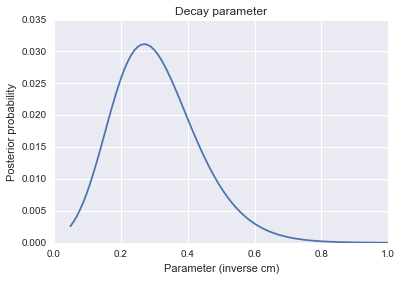

In [44]:
plt.plot(lam, prob)
plt.title('Decay parameter')
plt.xlabel('Parameter (inverse cm)')
plt.ylabel('Posterior probability')